In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import cluster
from sklearn.decomposition.pca import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn import preprocessing
from definitions import *

In [2]:
def angsep(ra1,dec1,ra2,dec2):
    SEP = numpy.cos(dec1*numpy.pi/180)*numpy.cos(dec2*numpy.pi/180)*numpy.cos((ra1-ra2)*numpy.pi/180)
    SEP += numpy.sin(dec1*numpy.pi/180)*numpy.sin(dec2*numpy.pi/180) #returns values between 0 and pi radians
    SEP = numpy.arccos(SEP)
    return SEP*180./numpy.pi

In [3]:
pd_common_gevtevxmm = pd.read_csv("markeddata/"+ get_name_for_gevtevxmm()+"_normalized.txt", sep='\t')
pd_common_gevtevxmm_noLog = pd.read_csv("markeddata/"+ get_name_for_gevtevxmm()+"_normalizedWITHOUT_LOG.txt", sep='\t')

In [4]:
pd_common_gevtevxmm_noLog[pd_common_gevtevxmm_noLog['marked']== 1]

,xmm_SC_EP_1_FLUX,xmm_SC_EP_2_FLUX,xmm_SC_EP_3_FLUX,xmm_SC_EP_4_FLUX,xmm_SC_EP_5_FLUX,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,...,gev_GLAT,gev_RAJ2000,gev_DEJ2000,tev_fermi_names,tev_classes,tev_glat,tev_glon,tev_pos_dec,tev_pos_ra,marked
239,0.000000,0.000000,7.023552e-06,0.000000,0.000075,0.014498,0.216180,0.331050,0.099179,0.322267,...,1.086277,40.137901,61.228100,b'',b'bin',1.086135,135.675278,61.229336,40.131950,1
618,0.000002,0.000021,1.414879e-04,0.000000,0.000000,0.006511,0.225747,0.309660,0.088945,0.355675,...,-1.690106,154.729904,-58.945599,b'1FGL J1018.6-5856',b'bin',-1.779517,284.314087,-59.000001,154.575002,1
1745,0.000000,0.000000,8.910548e-07,0.000006,0.000094,0.007597,0.117052,0.309318,0.034502,0.203520,...,-1.293795,276.568390,-14.847300,b'',b'bin',-1.289216,16.881586,-14.848400,276.562744,1
1980,0.000002,0.000004,3.906613e-05,0.000135,0.000219,0.018194,0.188459,0.378546,0.078329,0.293264,...,1.185560,303.908295,37.160599,b'',"b'pwn,snr'",1.150181,74.953850,37.214764,304.007606,1


In [5]:
pd_common_gevtevxmm[pd_common_gevtevxmm['marked'] != 0]

,xmm_SC_EP_1_FLUX,xmm_SC_EP_2_FLUX,xmm_SC_EP_3_FLUX,xmm_SC_EP_4_FLUX,xmm_SC_EP_5_FLUX,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,...,gev_GLAT,gev_RAJ2000,gev_DEJ2000,tev_fermi_names,tev_classes,tev_glat,tev_glon,tev_pos_dec,tev_pos_ra,marked
239,-inf,-inf,0.103970,-inf,0.096625,0.080271,0.071880,0.070557,0.074300,0.070641,...,1.086277,40.137901,61.228100,b'',b'bin',1.086135,135.675278,61.229336,40.131950,1
618,0.097986,0.090901,0.085628,-inf,-inf,0.075088,0.065327,0.064457,0.067891,0.064076,...,-1.690106,154.729904,-58.945599,b'1FGL J1018.6-5856',b'bin',-1.779517,284.314087,-59.000001,154.575002,1
1745,-inf,-inf,0.103056,0.097581,0.089610,0.076931,0.069037,0.066232,0.072563,0.067440,...,-1.293795,276.568390,-14.847300,b'',b'bin',-1.289216,16.881586,-14.848400,276.562744,1
1980,0.083237,0.081672,0.076208,0.073368,0.072264,0.062133,0.056777,0.055179,0.058788,0.055763,...,1.185560,303.908295,37.160599,b'',"b'pwn,snr'",1.150181,74.953850,37.214764,304.007606,1


In [6]:
pd_common_gevtevxmm

,xmm_SC_EP_1_FLUX,xmm_SC_EP_2_FLUX,xmm_SC_EP_3_FLUX,xmm_SC_EP_4_FLUX,xmm_SC_EP_5_FLUX,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,...,gev_GLAT,gev_RAJ2000,gev_DEJ2000,tev_fermi_names,tev_classes,tev_glat,tev_glon,tev_pos_dec,tev_pos_ra,marked
0,0.068553,0.061488,0.059425,0.059511,0.062076,0.067910,0.067770,0.075313,0.069360,0.066077,...,1.337755,6.432600,64.069298,b'',b'snr',1.412930,120.092361,64.140802,6.339723,0
1,0.068907,0.061626,0.059742,0.060119,0.063590,0.067621,0.067482,0.074993,0.069065,0.065796,...,1.337755,6.432600,64.069298,b'',b'snr',1.412930,120.092361,64.140802,6.339723,0
2,0.081538,0.073453,0.073100,0.074908,-inf,0.068704,0.068562,0.076194,0.070171,0.066850,...,1.337755,6.432600,64.069298,b'',b'snr',1.412930,120.092361,64.140802,6.339723,0
3,0.072884,0.066512,0.065242,0.065769,0.076760,0.064350,0.064217,0.071365,0.065725,0.062614,...,1.337755,6.432600,64.069298,b'',b'snr',1.412930,120.092361,64.140802,6.339723,0
4,0.066945,0.059547,0.057954,0.058218,0.062214,0.068519,0.068377,0.075988,0.069982,0.066670,...,1.337755,6.432600,64.069298,b'',b'snr',1.412930,120.092361,64.140802,6.339723,0
5,0.073762,0.066913,0.065305,0.065872,0.078508,0.064035,0.063903,0.071016,0.065403,0.062307,...,1.337755,6.432600,64.069298,b'',b'snr',1.412930,120.092361,64.140802,6.339723,0
6,0.070027,0.062603,0.060849,0.062475,0.067580,0.066680,0.066542,0.073949,0.068104,0.064880,...,1.337755,6.432600,64.069298,b'',b'snr',1.412930,120.092361,64.140802,6.339723,0
7,0.074231,0.074503,0.065392,0.064912,0.071609,0.064007,0.063875,0.070985,0.065374,0.062280,...,1.337755,6.432600,64.069298,b'',b'snr',1.412930,120.092361,64.140802,6.339723,0
8,0.074905,0.067433,0.067247,0.067549,0.074540,0.063906,0.063774,0.070873,0.065271,0.062181,...,1.337755,6.432600,64.069298,b'',b'snr',1.412930,120.092361,64.140802,6.339723,0
9,0.075823,0.071235,0.065737,0.065348,0.075268,0.063735,0.063603,0.070683,0.065096,0.062015,...,1.337755,6.432600,64.069298,b'',b'snr',1.412930,120.092361,64.140802,6.339723,0


In [7]:
pd_common_gevtevxmm = pd_common_gevtevxmm.loc[:, ~pd_common_gevtevxmm.columns.str.contains('^Unnamed')]

In [8]:
spectra_columns = list_xmm_spectra_columns() + list_gev_spectrum_columns() + list_tev_spectrum_columns()
other_columns = list_xmm_other_columns() + list_gev_other_columns() + list_tev_other_columns()

In [9]:
def show_marked_spectra(spectra_columns, spectra):
    plt.clf()
    fig, ax = plt.subplots(figsize=(16,6))
    marked_spectra = spectra[spectra['marked'] == 1]
    
    for i in range(0,len(marked_spectra)):
        table = marked_spectra[spectra_columns].iloc[i]
        values = table.values

        spectra_points_number = len(spectra_columns)
        plt.xticks(())
        #if i == 0:
        #    plt.setp([plt], title='Normalized columns')
        if i == 3:
            #plt.set_xlabel('optics - gev - tev')
            plt.xticks(range(spectra_points_number), spectra_columns,rotation=45)
        ax.plot(range(len(values)), marked_spectra[spectra_columns].iloc[i].values, label=marked_spectra['gev_1FGL_Name'].values[i])
        legend = ax.legend(loc = 'upper right')   
    plt.show()

In [10]:
(pd_common_gevtevxmm[pd_common_gevtevxmm['marked'] == 1])[['gev_1FGL_Name', 's_MAIN_ID', 's_class', 'tev_glat', 'tev_glon']]

,gev_1FGL_Name,s_MAIN_ID,s_class,tev_glat,tev_glon
239,b'1FGL J0240.5+6113 ',"[""b'BD+60 529'"" ""b'EM* MWC 56'"" ""b'LS I ...",['B' 'B' 'B0Ve' 'B0Ve'],1.086135,135.675278
618,b'1FGL J1018.6-5856 ',"[""b'2FGL J1019.0-5856'""]",['B0Ve'],-1.779517,284.314087
1745,b'1FGL J1826.2-1450 ',"[""b'LS IV -14 55'"" ""b'BD-14 5047'"" ""b'V* V...",['B' 'B0Ve' 'B0Ve'],-1.289216,16.881586
1980,b'1FGL J2015.7+3708 ',"[""b'Hen 2-461'"" ""b'Hen 2-461'""]",['Be' 'B'],1.150181,74.953850


<Figure size 432x288 with 0 Axes>

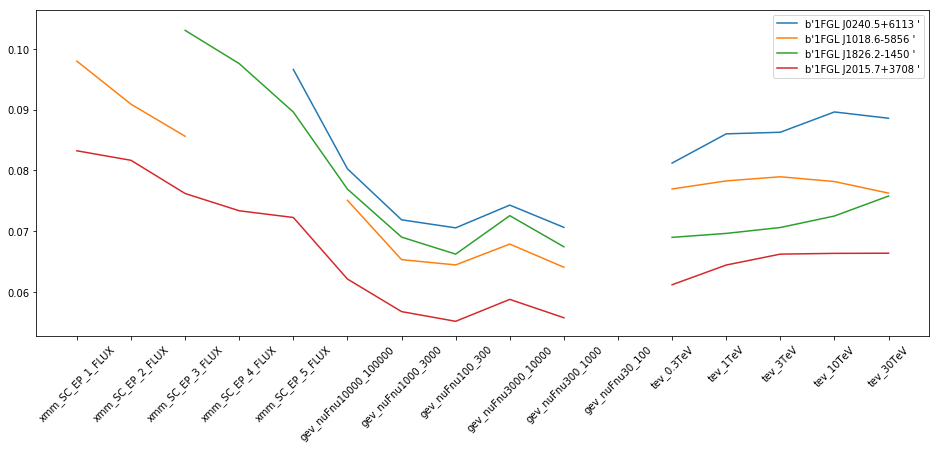

In [11]:
show_marked_spectra(spectra_columns, pd_common_gevtevxmm)

<Figure size 432x288 with 0 Axes>

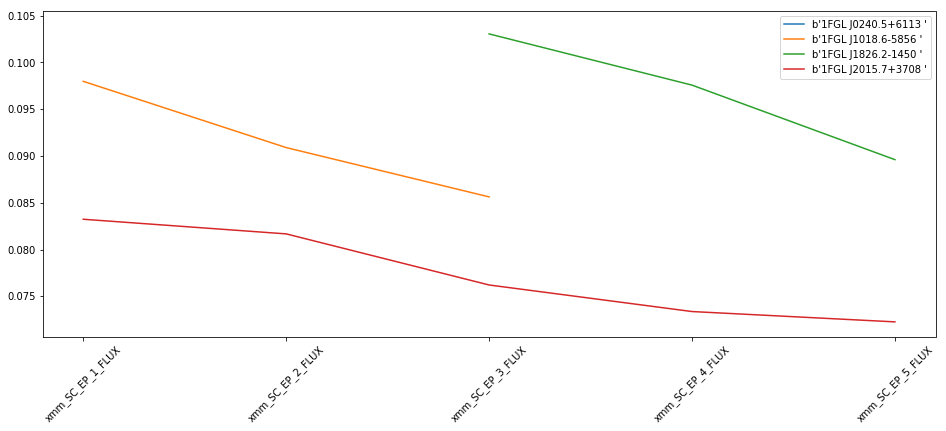

In [12]:
show_marked_spectra(list_xmm_spectra_columns(), pd_common_gevtevxmm)

<Figure size 432x288 with 0 Axes>

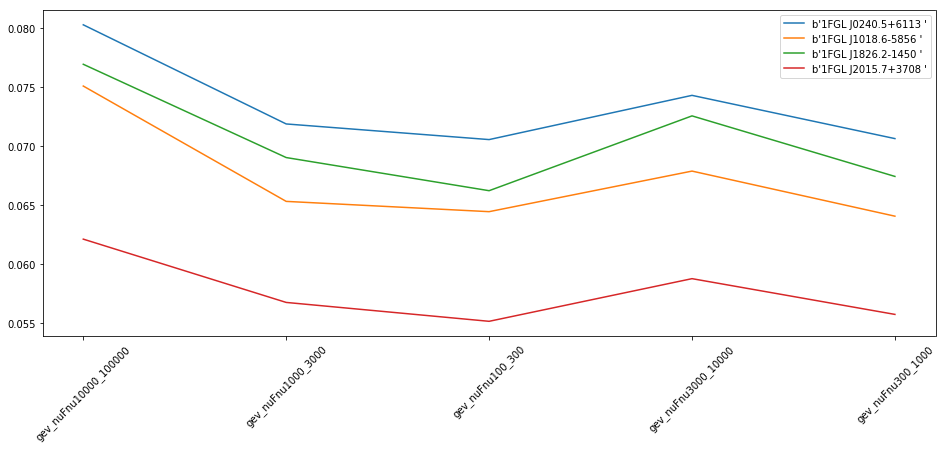

In [13]:
show_marked_spectra(list_gev_spectrum_columns(), pd_common_gevtevxmm)

<Figure size 432x288 with 0 Axes>

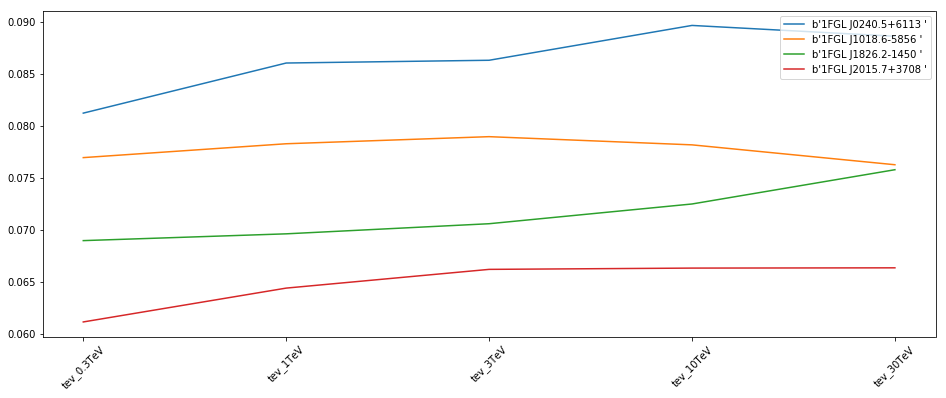

In [14]:
show_marked_spectra(list_tev_spectrum_columns(), pd_common_gevtevxmm)

<Figure size 432x288 with 0 Axes>

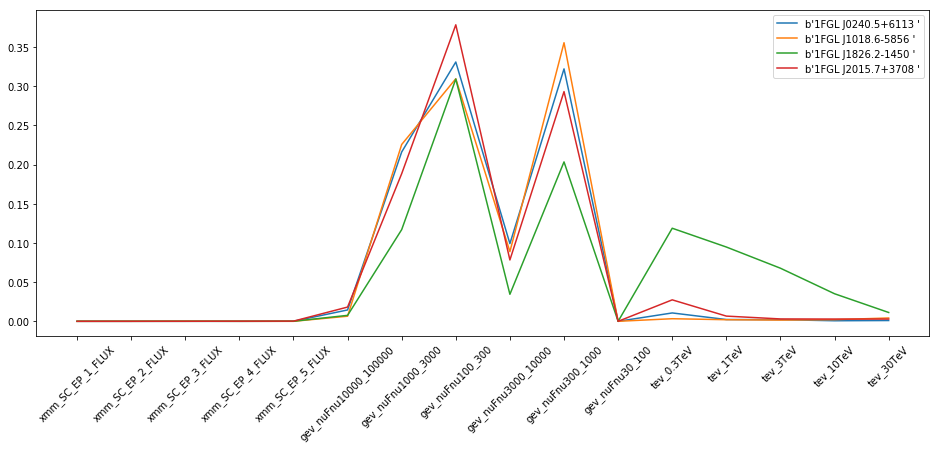

In [15]:
show_marked_spectra(spectra_columns, pd_common_gevtevxmm_noLog)